<a href="https://colab.research.google.com/github/baowaly/ml/blob/master/Loan_Approval_Prediction_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction Using Deep Learning


---

# Data Preprocessing

## 1. Import libraries and Dataset

In [88]:
# importing required libraries
import pandas as pd
import sklearn
from sklearn import preprocessing

In [89]:
# reading the loan prediction data
data = pd.read_csv('loan_data.csv')

In [90]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
# shape of the data
data.shape

(614, 13)

In [92]:
# checking missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# data types of the variables, object means category features
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 2. Filling Missing Values
Replace categorical missing data with mode and  continuous missing data with mean

In [94]:
# filling missing values of categorical variables with mode
missing_cat_cols =['Gender','Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in missing_cat_cols:
  data[col].fillna(data[col].mode()[0], inplace=True)


In [95]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [96]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## 3. Converting categorical features to numeric

In [98]:
categorical_columns =['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
     data[col]= data[col].astype('category')
     data[col] = data[col].cat.codes


In [99]:
# again looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## 4. Normalization
Scales all numeric values in the range [0,1]

In [100]:
#normalize data without first (Loan_ID) and last (Loan_Status) column
for col in data.columns[1:-1]:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

In [101]:
# again looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1
1,LP001003,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0
2,LP001005,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1
3,LP001006,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1
4,LP001008,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1


In [102]:
# saving the pre-processed data
data.to_csv('loan_prediction_data.csv', index=False)

# Build a Neural Network Model Using Keras

## 1. Loading the dataset

In [103]:
# importing the required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [105]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1
1,LP001003,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0
2,LP001005,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1
3,LP001006,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1
4,LP001008,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1


In [106]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [107]:
# looking at the shape of the data
data.shape

(614, 12)

In [108]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [109]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation dataset

In [110]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [111]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [112]:
# looking at the first five rows of the training dataset
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
164,1.0,1.0,0.000000,0.0,0.0,0.113457,0.000000,0.095514,0.358974,1.0,1.0
171,1.0,1.0,1.000000,0.0,0.0,0.638380,0.000000,1.000000,0.615385,1.0,1.0
546,1.0,0.0,0.000000,1.0,0.0,0.039678,0.000000,0.102750,0.051282,1.0,0.5
226,1.0,1.0,0.000000,1.0,1.0,0.056710,0.000000,0.186686,0.743590,1.0,1.0
176,1.0,1.0,0.666667,0.0,0.0,0.023438,0.038856,0.133140,0.743590,1.0,0.0


In [113]:
# looking at the first five rows of the test dataset
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
507,1.0,0.0,0.0,0.0,0.0,0.042461,0.000000,0.125904,0.74359,1.0,1.0
493,0.0,0.0,0.0,1.0,1.0,0.211664,0.000000,0.312590,0.74359,1.0,0.5
434,1.0,0.0,0.0,0.0,0.0,0.044527,0.000000,0.131693,0.74359,1.0,1.0
125,0.0,0.0,0.0,0.0,0.0,0.043810,0.000000,0.121563,0.74359,1.0,0.0
294,1.0,1.0,0.0,0.0,0.0,0.027619,0.080015,0.235890,0.74359,1.0,0.5


## 3. Defining the architecture of the model

In [114]:
# checking the version of keras
import keras
print(keras.__version__)

2.8.0


In [115]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [116]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 
from keras.models import Sequential

In [117]:
# defining input neurons
input_neurons = X_train.shape[1]

In [118]:
# define number of output neurons
output_neurons = 1

In [169]:
# defining the architecture of the model
# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=10, activation='relu'))
#input and first hidden layer together
#model.add(Dense(units=12, input_dim=input_neurons, activation='relu'))
model.add(Dense(units=5, activation='relu'))
#model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [170]:
# summary of the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                120       
                                                                 
 dense_40 (Dense)            (None, 5)                 55        
                                                                 
 dense_41 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the model (defining loss function, optimizer)

In [171]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [172]:
# training the model

# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of each epoch

# setting the epochs 
no_epochs = 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=no_epochs, batch_size=32)

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 0.6628 - accuracy: 0.6456 - val_loss: 0.6399 - val_accuracy: 0.6829
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.6843 - val_loss: 0.6207 - val_accuracy: 0.6992
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.6864 - val_loss: 0.6093 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6123 - accuracy: 0.6864 - val_loss: 0.6006 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6047 - accuracy: 0.6864 - val_loss: 0.5938 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5985 - accuracy: 0.6864 - val_loss: 0.5872 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.6864 - val_loss: 0.5808 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

## 6. Evaluating model performance on validation set

In [194]:
# getting predictions for the validation set
#prediction = model.predict(X_test).round().astype(int)
prediction = (model.predict(X_test) > 0.5).astype(int)

In [195]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualizing the model performance

In [177]:
# list all data in model history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


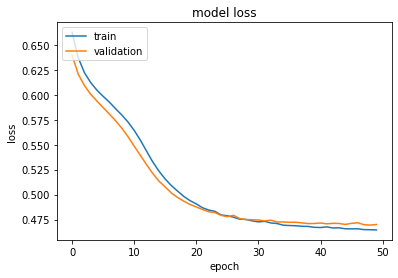

In [178]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

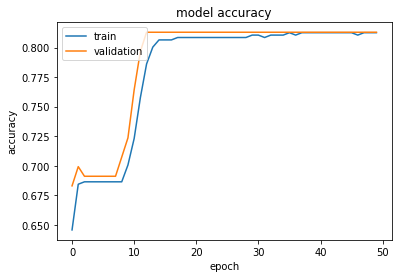

In [179]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()